In [ ]:
!pip install wget
!pip install --upgrade scikit-learn

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=2fd7c2e27061db246603892d27f0d74b76b33a311635a05f308710e9814044c2
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
     |████████████████████████████████| 22.3MB 2.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import util

X1, y1, X2, y2 = util.mnist_init('small')


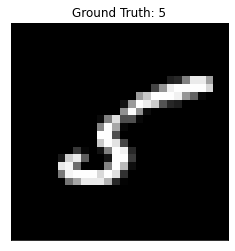

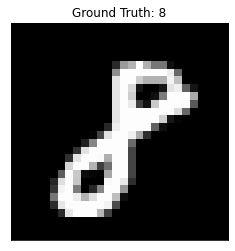

In [ ]:
util.image_peek(X1[1], 5 if y1[1] == 1 else 8)
util.image_peek(X1[3], 5 if y1[3] == 1 else 8)

In [ ]:
import numpy as np


class Perceptron(object):
    def __init__(self, dataset, labels, max_iter, lr):
        self.b = 0
        self.w = np.zeros(dataset.shape[1])
        self.labels = labels
        self.dataset = dataset
        self.max_iter = max_iter
        self.lr = lr
        self.func = lambda x: 1 if x > 0 else -1

    def fit(self):
        for i in range(self.max_iter):
            flag = 0
            for x, y in zip(self.dataset, self.labels):
                y_ = self.func(np.dot(self.w, x) + self.b)
                if y*y_<0:
                    self.w += (y - y_) * self.lr * x
                    self.b += (y - y_) * self.lr
                    flag = 1
            if flag == 0:
                break

    def predict(self, test_set):
        return [self.func(np.dot(self.w, x) + self.b) for x in test_set]

    def score(self, test_set, test_labels, view=False):
        if view == True:
            util.image_peek(self.w, "Weight")
        y_predict = self.predict(test_set)
        return sum(y_predict[i] == test_labels[i] for i in range(len(test_labels))) / len(test_labels)

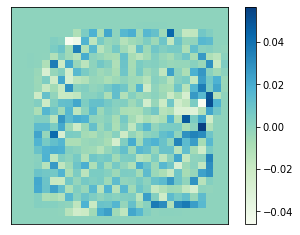

0.9356913183279743
0.9356806783516881
0.9369354333753832


In [ ]:
clf = Perceptron(X1, y1, 100, 1e-6)
clf.fit()
print(clf.score(X2, y2, True))

y_pred = clf.predict(X2)
print(util.f1_score(y2, y_pred))
print(util.recall_score(y2, y_pred))

In [ ]:
clf = Perceptron(X1, y1, 100, 1e-3)
clf.fit()
print(clf.score(X2, y2))

y_pred = clf.predict(X2)
print(util.f1_score(y2, y_pred))
print(util.recall_score(y2, y_pred))

0.9356913183279743
0.9356806783516881
0.9369354333753832


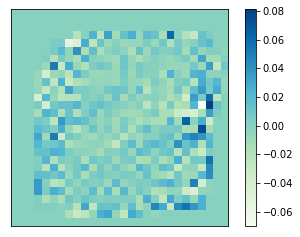

0.9362272240085745
0.9362138694201786
0.9374015893039659


In [ ]:
clf = Perceptron(X1, y1, 200, 1e-6)
clf.fit()
print(clf.score(X2, y2, True))

y_pred = clf.predict(X2)
print(util.f1_score(y2, y_pred))
print(util.recall_score(y2, y_pred))

In [ ]:
clf = Perceptron(X1, y1, 200, 1e-3)
clf.fit()
print(clf.score(X2, y2))

y_pred = clf.predict(X2)
print(util.f1_score(y2, y_pred))
print(util.recall_score(y2, y_pred))

0.9362272240085745
0.9362138694201786
0.9374015893039659


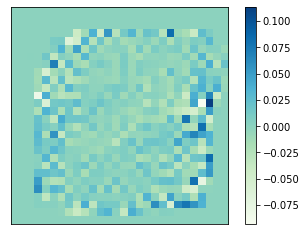

0.927652733118971
0.9276517149941109
0.9296127567886114


In [ ]:
clf = Perceptron(X1, y1, 400, 1e-6)
clf.fit()
print(clf.score(X2, y2, True))

y_pred = clf.predict(X2)
print(util.f1_score(y2, y_pred))
print(util.recall_score(y2, y_pred))

In [ ]:
clf = Perceptron(X1, y1, 400, 1e-3)
clf.fit()
print(clf.score(X2, y2))

y_pred = clf.predict(X2)
print(util.f1_score(y2, y_pred))
print(util.recall_score(y2, y_pred))

0.927652733118971
0.9276517149941109
0.9296127567886114


In [ ]:
class LSEClassifier(object):
    def __init__(self, dataset, labels, max_iter, lr):
        
        self.dataset = np.array([np.append(dataset[i]*labels[i], labels[i]) for i in range(len(dataset))])
        self.labels = labels
        self.b = np.ones(self.dataset.shape[0])
        self.w = None
        self.max_iter = max_iter
        self.lr = lr

    def fit(self):
        for i in range(self.max_iter):
            self.w = np.dot(np.linalg.pinv(self.dataset), self.b)    
            e = np.dot(self.dataset, self.w) - self.b
            if np.all(self.b <= 0):
                break    
            else:
                self.b = self.b + self.lr*(e*abs(e))

    def predict(self, test_set):
        return np.dot(test_set, self.w)

    def score(self, test_set, test_labels):
        test_set = np.array([np.append(test_set[i]*test_labels[i], test_labels[i]) for i in range(len(test_set))])
        y_predict = self.predict(test_set)
        return sum([y_predict[i]>0 for i in range(len(y_predict))])/len(y_predict)

In [ ]:
clf = LSEClassifier(X1, y1, 20, 1e-4)
clf.fit()
print(clf.score(X2, y2))

0.9512325830653805


In [ ]:
clf = LSEClassifier(X1, y1, 40, 1e-4)
clf.fit()
print(clf.score(X2, y2))

0.9512325830653805


In [ ]:
clf = LSEClassifier(X1, y1, 20, 1e-2)
clf.fit()
print(clf.score(X2, y2))

0.9506966773847803


In [ ]:
clf = LSEClassifier(X1, y1, 40, 1e-2)
clf.fit()
print(clf.score(X2, y2))

0.9490889603429796


In [ ]:
class FisherClassifier(object):
    def __init__(self, dataset, labels):
        
        self.dataset = dataset
        self.labels = labels
        self.w = None
        bnd = None
       
    def fit(self):
        case1_dt = np.array([self.dataset[i] for i in range(self.dataset.shape[0]) if self.labels[i] == 1])
        case2_dt = np.array([self.dataset[i] for i in range(self.dataset.shape[0]) if self.labels[i] == -1])

        case1_mean = np.mean(case1_dt, axis=0)
        case2_mean = np.mean(case2_dt, axis=0)

        case1_sw = np.dot((case1_dt - case1_mean).T, (case1_dt - case1_mean))
        case2_sw = np.dot((case2_dt - case2_mean).T, (case2_dt - case2_mean))

        self.w = np.dot(np.linalg.pinv(case1_sw + case2_sw), (case1_mean - case2_mean))
        self.bnd = (np.dot(self.w, case1_mean) + np.dot(self.w, case2_mean))/2

    def score(self, test_set, test_labels, view=False):
        case1_dt = np.array([test_set[i] for i in range(test_set.shape[0]) if test_labels[i] == 1])
        case2_dt = np.array([test_set[i] for i in range(test_set.shape[0]) if test_labels[i] == -1])
        case1_proj = [np.dot(self.w, x) for x in case1_dt]
        case2_proj = [np.dot(self.w, x) for x in case2_dt]
        case1_ac = sum([x>self.bnd for x in case1_proj])/len(case1_proj)
        case2_ac = sum([x<self.bnd for x in case2_proj])/len(case2_proj)
        total_ac = sum([x>self.bnd for x in case1_proj]+[x<self.bnd for x in case2_proj])/(len(case1_proj)+len(case2_proj))
        
        return case1_ac, case2_ac, total_ac

In [ ]:
clf = FisherClassifier(X1, y1)
clf.fit()
clf.score(X2, y2)

(0.9618834080717489, 0.9404517453798767, 0.9506966773847803)

In [ ]:
X1, y1, X2, y2 = util.mnist_init('complete')

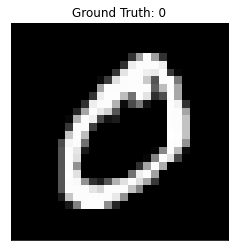

In [ ]:
util.image_peek(X1[1], y1[1])

In [ ]:
ac = []

for z1, z2 in util.convert2ovr(y1, y2):
    clf = Perceptron(X1, z1, 200, 1e-3)
    clf.fit()
    ac.append(clf.score(X2, z2))

print(ac)
np.mean(ac, axis=0)
   

[0.9897, 0.9884, 0.9597, 0.914, 0.9742, 0.9569, 0.9749, 0.9805, 0.89, 0.9467]


0.9574999999999999